### Feature Selection by Gradient Boosting Regressor for each neighborhood

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from project import handling_missing_values, LabelEncoder
%matplotlib inline

In [2]:
# Reading the data
df = pd.read_csv('train.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
Neighborhood = df['Neighborhood'].unique()

In [4]:
Neighborhood

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [5]:
for i in Neighborhood:
    vars()[i] = df.loc[df['Neighborhood'] == i]

In [6]:
Veenker

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
161,20,RL,NaN,11120,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,162500
327,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,5,2008,Con,Normal,324000
401,120,RL,38.0,14963,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,245500
673,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,165000
765,120,RL,30.0,9549,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,270000
850,80,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,187000
1156,20,RL,90.0,10768,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,218000


In [7]:
NPkVill

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
505,160,RL,24.0,2308,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,147000
551,120,RL,53.0,4043,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,140000
676,160,RL,24.0,2289,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,148500
963,160,RL,24.0,2308,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,155000
1161,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2010,WD,Normal,146000
1422,120,RL,53.0,4043,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2010,WD,Normal,127500
1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750


In [8]:
var_names = [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, Somerst,NWAmes, OldTown, BrkSide, Sawyer, NridgHt, NAmes,
     SawyerW, IDOTRR, MeadowV, Edwards, Timber, Gilbert,StoneBr, ClearCr, NPkVill, Blmngtn, BrDale, SWISU,Blueste]
var_names[0].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000
33,20,RL,85.0,11049,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,179900


In [9]:
for neighborhood in var_names:
    neighborhood.drop(labels = 'Neighborhood', axis=1, inplace=True)
    handling_missing_values(neighborhood)
    neighborhood = LabelEncoder(neighborhood)

/home/sami/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/sami/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/sami/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [10]:
Veenker

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2,20,3,80.0,9600,2,0,4,Lvl,AllPub,FR2,...,0,0,0,NoMisc,0,5,2007,WD,6,181500
54,20,3,68.0,50271,2,0,3,Low,AllPub,Inside,...,0,0,0,NoMisc,0,11,2006,WD,6,385000
161,20,3,31.0,11120,2,0,3,Lvl,AllPub,CulDSac,...,0,0,0,NoMisc,0,6,2008,WD,6,162500
327,120,3,32.0,10846,2,0,3,Lvl,AllPub,CulDSac,...,0,0,0,NoMisc,0,5,2008,Con,6,324000
401,120,3,38.0,14963,2,0,2,Lvl,AllPub,Inside,...,0,0,0,NoMisc,0,12,2008,WD,6,245500
673,20,3,53.0,11250,2,0,3,Lvl,AllPub,Inside,...,0,0,0,NoMisc,0,6,2006,WD,6,165000
765,120,3,30.0,9549,2,0,3,Lvl,AllPub,CulDSac,...,0,0,0,NoMisc,0,4,2006,WD,6,270000
850,80,3,80.0,9600,2,0,4,Lvl,AllPub,FR2,...,0,0,0,NoMisc,0,8,2007,WD,6,187000
1156,20,3,90.0,10768,2,0,3,Lvl,AllPub,Corner,...,0,0,0,NoMisc,0,7,2007,WD,6,218000


In [11]:
var_names[1]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2,20,3,80.0,9600,2,0,4,Lvl,AllPub,FR2,...,0,0,0,NoMisc,0,5,2007,WD,6,181500
54,20,3,68.0,50271,2,0,3,Low,AllPub,Inside,...,0,0,0,NoMisc,0,11,2006,WD,6,385000
161,20,3,31.0,11120,2,0,3,Lvl,AllPub,CulDSac,...,0,0,0,NoMisc,0,6,2008,WD,6,162500
327,120,3,32.0,10846,2,0,3,Lvl,AllPub,CulDSac,...,0,0,0,NoMisc,0,5,2008,Con,6,324000
401,120,3,38.0,14963,2,0,2,Lvl,AllPub,Inside,...,0,0,0,NoMisc,0,12,2008,WD,6,245500
673,20,3,53.0,11250,2,0,3,Lvl,AllPub,Inside,...,0,0,0,NoMisc,0,6,2006,WD,6,165000
765,120,3,30.0,9549,2,0,3,Lvl,AllPub,CulDSac,...,0,0,0,NoMisc,0,4,2006,WD,6,270000
850,80,3,80.0,9600,2,0,4,Lvl,AllPub,FR2,...,0,0,0,NoMisc,0,8,2007,WD,6,187000
1156,20,3,90.0,10768,2,0,3,Lvl,AllPub,Corner,...,0,0,0,NoMisc,0,7,2007,WD,6,218000


In [12]:
Dummy_names = ['CollgCr_D', 'Veenker_D', 'Crawfor_D', 'NoRidge_D', 'Mitchel_D', 'Somerst_D',
       'NWAmes_D', 'OldTown_D', 'BrkSide_D', 'Sawyer_D', 'NridgHt_D', 'NAmes_D',
       'SawyerW_D', 'IDOTRR_D', 'MeadowV_D', 'Edwards_D', 'Timber_D', 'Gilbert_D',
       'StoneBr_D', 'ClearCr_D', 'NPkVill_D', 'Blmngtn_D', 'BrDale_D', 'SWISU_D',
       'Blueste_D']

for indx, val in enumerate(Dummy_names):
    vars()[val] = pd.get_dummies(var_names[indx], drop_first= True)


In [13]:
Veenker_D

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,Exterior1st_Plywood,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,Foundation_PConc,SaleType_WD
Id,,,,,,,,,,,,,,,,,,,,,
2,20,3,80.0,9600,2,0,4,1,6,8,...,0,0,0,1,0,0,0,1,0,1
54,20,3,68.0,50271,2,0,3,1,9,5,...,0,0,1,0,0,0,1,1,0,1
161,20,3,31.0,11120,2,0,3,1,6,6,...,1,0,0,0,1,0,0,1,1,1
327,120,3,32.0,10846,2,0,3,1,8,5,...,0,0,0,0,0,0,0,1,1,0
401,120,3,38.0,14963,2,0,2,1,8,5,...,0,0,0,0,0,0,0,1,1,1
673,20,3,53.0,11250,2,0,3,1,6,6,...,1,0,0,0,1,0,0,1,0,1
765,120,3,30.0,9549,2,0,3,1,8,5,...,0,0,0,0,0,0,0,1,1,1
850,80,3,80.0,9600,2,0,4,1,6,7,...,1,0,0,0,1,0,0,0,0,1
1156,20,3,90.0,10768,2,0,3,1,5,8,...,1,0,0,0,1,0,0,1,0,1


In [14]:
Dummy_var = [CollgCr_D, Veenker_D, Crawfor_D, NoRidge_D, Mitchel_D, Somerst_D,NWAmes_D, OldTown_D, BrkSide_D, Sawyer_D, NridgHt_D, NAmes_D,
     SawyerW_D, IDOTRR_D, MeadowV_D, Edwards_D, Timber_D, Gilbert_D,StoneBr_D, ClearCr_D, NPkVill_D, Blmngtn_D, BrDale_D, SWISU_D,Blueste_D]
Dummy_var[1]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,Exterior1st_Plywood,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,Foundation_PConc,SaleType_WD
Id,,,,,,,,,,,,,,,,,,,,,
2,20,3,80.0,9600,2,0,4,1,6,8,...,0,0,0,1,0,0,0,1,0,1
54,20,3,68.0,50271,2,0,3,1,9,5,...,0,0,1,0,0,0,1,1,0,1
161,20,3,31.0,11120,2,0,3,1,6,6,...,1,0,0,0,1,0,0,1,1,1
327,120,3,32.0,10846,2,0,3,1,8,5,...,0,0,0,0,0,0,0,1,1,0
401,120,3,38.0,14963,2,0,2,1,8,5,...,0,0,0,0,0,0,0,1,1,1
673,20,3,53.0,11250,2,0,3,1,6,6,...,1,0,0,0,1,0,0,1,0,1
765,120,3,30.0,9549,2,0,3,1,8,5,...,0,0,0,0,0,0,0,1,1,1
850,80,3,80.0,9600,2,0,4,1,6,7,...,1,0,0,0,1,0,0,0,0,1
1156,20,3,90.0,10768,2,0,3,1,5,8,...,1,0,0,0,1,0,0,1,0,1


In [15]:
Dummy_vars = [CollgCr_D, Veenker_D, Crawfor_D, NoRidge_D, Mitchel_D, Somerst_D,NWAmes_D, OldTown_D, BrkSide_D, Sawyer_D, NridgHt_D, NAmes_D,
     SawyerW_D, IDOTRR_D, MeadowV_D, Edwards_D, Timber_D, Gilbert_D,StoneBr_D, ClearCr_D, NPkVill_D, Blmngtn_D, BrDale_D, SWISU_D]

In [16]:
CollgCr_F = [] 
Veenker_F = []
Crawfor_F = [] 
NoRidge_F = []
Mitchel_F = []
Somerst_F = []
NWAmes_F = []
OldTown_F = []
BrkSide_F = []
Sawyer_F = []
NridgHt_F = []
NAmes_F = []
SawyerW_F = []
IDOTRR_F = []
MeadowV_F = []
Edwards_F = []
Timber_F = []
Gilbert_F = []
StoneBr_F = []
ClearCr_F = []
NPkVill_F = []
Blmngtn_F = []
BrDale_F = []
SWISU_F = []
top_cols = []
for indx,df in enumerate(Dummy_vars):
    y = np.log(df['SalePrice'])
    x = df.drop(labels = 'SalePrice', axis=1).astype("float64")
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
    GBR = GradientBoostingRegressor(learning_rate= 0.1, n_estimators=1500, max_depth=2)
    GBR.fit(x_train, y_train)
    important_cols = x.columns[GBR.feature_importances_ > 0.0]
    values = GBR.feature_importances_[GBR.feature_importances_ > 0.0]
    top_cols.append(important_cols[np.where(values==max(values))[0][0]])
    if Dummy_names[indx] == 'CollgCr_D':
        for i in sorted(values,reverse=True):
            CollgCr_F.append(important_cols[np.where(values==i)[0][0]])
    elif Dummy_names[indx] == 'Veenker_D':
        for i in sorted(values,reverse=True):
            Veenker_F.append(important_cols[np.where(values==i)[0][0]])
    elif Dummy_names[indx] == 'Crawfor_D':
        for i in sorted(values,reverse=True):
            Crawfor_F.append(important_cols[np.where(values==i)[0][0]])                  
    elif Dummy_names[indx] == 'NoRidge_D':
        for i in sorted(values,reverse=True):
            NoRidge_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'Mitchel_D':
        for i in sorted(values,reverse=True):
            Mitchel_F.append(important_cols[np.where(values==i)[0][0]])                    
    elif Dummy_names[indx] == 'Somerst_D':
        for i in sorted(values,reverse=True):
            Somerst_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'NWAmes_D':
        for i in sorted(values,reverse=True):
            NWAmes_F.append(important_cols[np.where(values==i)[0][0]])
    elif Dummy_names[indx] == 'OldTown_D':
        for i in sorted(values,reverse=True):
            OldTown_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'BrkSide_D':
        for i in sorted(values,reverse=True):
            BrkSide_F.append(important_cols[np.where(values==i)[0][0]])                     
    elif Dummy_names[indx] == 'Sawyer_D':
        for i in sorted(values,reverse=True):
            Sawyer_F.append(important_cols[np.where(values==i)[0][0]])                    
    elif Dummy_names[indx] == 'NridgHt_D':
        for i in sorted(values,reverse=True):
            NridgHt_F.append(important_cols[np.where(values==i)[0][0]])           
    elif Dummy_names[indx] == 'NAmes_D':
        for i in sorted(values,reverse=True):
            NAmes_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'SawyerW_D':
        for i in sorted(values,reverse=True):
            SawyerW_F.append(important_cols[np.where(values==i)[0][0]])                      
    elif Dummy_names[indx] == 'IDOTRR_D':
        for i in sorted(values,reverse=True):
            IDOTRR_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'MeadowV_D':
        for i in sorted(values,reverse=True):
            MeadowV_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'Edwards_D':
        for i in sorted(values,reverse=True):
            Edwards_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'Timber_D':
        for i in sorted(values,reverse=True):
            Timber_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'Gilbert_D':
        for i in sorted(values,reverse=True):
            Gilbert_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'StoneBr_D':
        for i in sorted(values,reverse=True):
            StoneBr_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'ClearCr_D':
        for i in sorted(values,reverse=True):
            ClearCr_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'NPkVill_D':
        for i in sorted(values,reverse=True):
            NPkVill_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'Blmngtn_D':
        for i in sorted(values,reverse=True):
            Blmngtn_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'BrDale_D':
        for i in sorted(values,reverse=True):
            BrDale_F.append(important_cols[np.where(values==i)[0][0]])            
    elif Dummy_names[indx] == 'SWISU_D':
        for i in sorted(values,reverse=True):
            SWISU_F.append(important_cols[np.where(values==i)[0][0]])             

In [17]:
top_cols

['GrLivArea',
 'BsmtUnfSF',
 'OverallQual',
 'GrLivArea',
 'GarageArea',
 'MSSubClass',
 'GrLivArea',
 'GrLivArea',
 'HouseStyle_1Story',
 'GarageType',
 'GrLivArea',
 'GrLivArea',
 'GarageArea',
 'CentralAir',
 'Fireplaces',
 'TotalBsmtSF',
 'TotalBsmtSF',
 'TotalBsmtSF',
 'MSSubClass',
 'BsmtQual',
 'MoSold',
 '1stFlrSF',
 'HeatingQC',
 '2ndFlrSF']

In [18]:
list(zip(Neighborhood,top_cols))

[('CollgCr', 'GrLivArea'),
 ('Veenker', 'BsmtUnfSF'),
 ('Crawfor', 'OverallQual'),
 ('NoRidge', 'GrLivArea'),
 ('Mitchel', 'GarageArea'),
 ('Somerst', 'MSSubClass'),
 ('NWAmes', 'GrLivArea'),
 ('OldTown', 'GrLivArea'),
 ('BrkSide', 'HouseStyle_1Story'),
 ('Sawyer', 'GarageType'),
 ('NridgHt', 'GrLivArea'),
 ('NAmes', 'GrLivArea'),
 ('SawyerW', 'GarageArea'),
 ('IDOTRR', 'CentralAir'),
 ('MeadowV', 'Fireplaces'),
 ('Edwards', 'TotalBsmtSF'),
 ('Timber', 'TotalBsmtSF'),
 ('Gilbert', 'TotalBsmtSF'),
 ('StoneBr', 'MSSubClass'),
 ('ClearCr', 'BsmtQual'),
 ('NPkVill', 'MoSold'),
 ('Blmngtn', '1stFlrSF'),
 ('BrDale', 'HeatingQC'),
 ('SWISU', '2ndFlrSF')]

In [19]:
Crawfor_F

['OverallQual',
 '1stFlrSF',
 'GrLivArea',
 'YearRemodAdd',
 'LotFrontage',
 'LandSlope',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'GarageQual',
 'OpenPorchSF',
 'HalfBath',
 'OverallCond',
 'GarageCond',
 'Exterior2nd_VinylSd',
 'MoSold',
 'YrSold',
 'WoodDeckSF',
 'YearBuilt',
 'EnclosedPorch',
 'LotArea',
 '2ndFlrSF',
 'Exterior2nd_Stucco',
 'FireplaceQu',
 'Exterior2nd_Wd Shng',
 'BsmtHalfBath',
 'LotConfig_FR2',
 'GarageYrBlt',
 'LotShape',
 'GarageArea',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_MetalSd',
 'ExterQual',
 'MasVnrArea',
 '3SsnPorch',
 'KitchenQual',
 'SaleType_WD',
 'ExterCond',
 'SaleType_CWD',
 'RoofStyle_Gambrel',
 'HouseStyle_2.5Unf',
 'GarageType',
 'Exterior1st_Plywood',
 'Exterior1st_MetalSd',
 'TotRmsAbvGrd',
 'Fireplaces',
 'BldgType_2fmCon',
 'Foundation_PConc',
 'Exterior1st_Stucco',
 'BsmtCond',
 'BsmtQual',
 'Condition1_Norm',
 'LandContour_Lvl',
 'FullBath',
 'HouseStyle_2Story',
 'LandContour_HLS',
 'MSSubClass',
 'Foundation_CBlock',
 'BedroomAbvGr'

In [20]:
feature = pd.DataFrame()

In [21]:
feature['CollgCr'] = pd.Series(CollgCr_F)
feature['Veenker'] = pd.Series(Veenker_F)
feature['Crawfor'] = pd.Series(Crawfor_F)
feature['NoRidge'] = pd.Series(NoRidge_F)
feature['Mitchel'] = pd.Series(Mitchel_F)
feature['Somerst'] = pd.Series(Somerst_F)
feature['NWAmes'] = pd.Series(NWAmes_F)
feature['OldTown'] = pd.Series(OldTown_F)
feature['BrkSide'] = pd.Series(BrkSide_F)
feature['Sawyer'] = pd.Series(Sawyer_F)
feature['NridgHt'] = pd.Series(NridgHt_F)
feature['NAmes'] = pd.Series(NAmes_F)
feature['SawyerW'] = pd.Series(SawyerW_F)
feature['IDOTRR'] = pd.Series(IDOTRR_F)
feature['MeadowV'] = pd.Series(MeadowV_F)
feature['Edwards'] = pd.Series(Edwards_F)
feature['Timber'] = pd.Series(Timber_F)
feature['Gilbert'] = pd.Series(Gilbert_F)
feature['StoneBr'] = pd.Series(StoneBr_F)
feature['ClearCr'] = pd.Series(ClearCr_F)
feature['NPkVill'] = pd.Series(NPkVill_F)
feature['Blmngtn'] = pd.Series(Blmngtn_F)
feature['BrDale'] = pd.Series(BrDale_F)
feature['SWISU'] = pd.Series(SWISU_F)

In [23]:
feature.head()

,CollgCr,Veenker,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,Sawyer,...,MeadowV,Edwards,Timber,Gilbert,StoneBr,ClearCr,NPkVill,Blmngtn,BrDale,SWISU
0,GrLivArea,BsmtUnfSF,OverallQual,GrLivArea,GarageArea,MSSubClass,GrLivArea,GrLivArea,HouseStyle_1Story,GarageType,...,Fireplaces,TotalBsmtSF,TotalBsmtSF,TotalBsmtSF,MSSubClass,BsmtQual,MoSold,1stFlrSF,HeatingQC,2ndFlrSF
1,FullBath,Exterior2nd_Plywood,1stFlrSF,OverallQual,FireplaceQu,LotArea,YearBuilt,Heating_Grav,GrLivArea,FireplaceQu,...,LotArea,GrLivArea,YrSold,2ndFlrSF,LotArea,LotArea,YrSold,KitchenQual,MasVnrArea,TotalBsmtSF
2,OverallQual,1stFlrSF,GrLivArea,TotalBsmtSF,TotalBsmtSF,GrLivArea,YearRemodAdd,OverallQual,TotalBsmtSF,1stFlrSF,...,GarageFinish,YearBuilt,GarageArea,GrLivArea,YearRemodAdd,WoodDeckSF,BsmtUnfSF,BsmtExposure,OpenPorchSF,1stFlrSF
3,GarageArea,GarageFinish,YearRemodAdd,1stFlrSF,YearBuilt,BsmtFinSF1,FireplaceQu,LotArea,PavedDrive,TotalBsmtSF,...,FireplaceQu,FullBath,GrLivArea,YearRemodAdd,GrLivArea,1stFlrSF,BsmtFinSF1,GarageArea,YrSold,Condition1_Norm
4,MasVnrType_Stone,Exterior1st_Plywood,LotFrontage,BsmtFinSF1,Fireplaces,TotalBsmtSF,OverallCond,GarageArea,LotArea,WoodDeckSF,...,GrLivArea,ExterCond,YearRemodAdd,BsmtFinType1,GarageCars,BsmtFinSF1,GarageYrBlt,BsmtFinSF1,MoSold,TotRmsAbvGrd


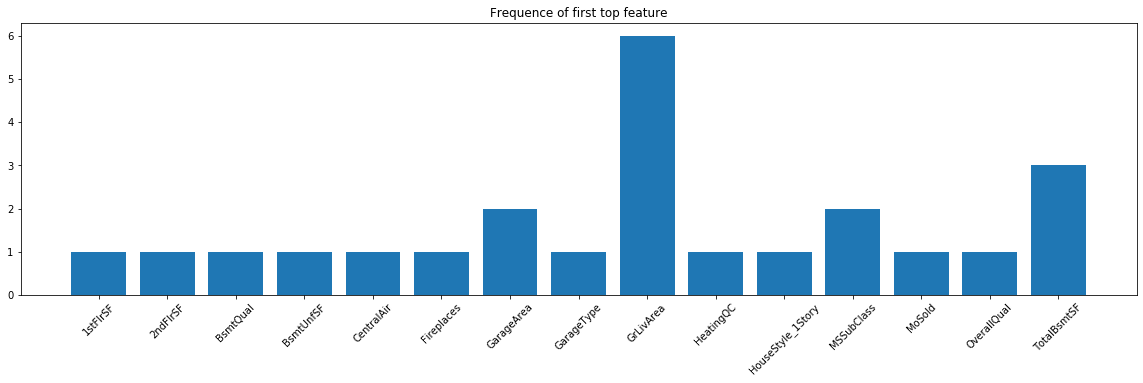

In [33]:
keys, counts = np.unique(feature.iloc[0], return_counts=True)

fig = plt.figure(figsize=(20,5))
#plt.subplot(121)
plt.bar(keys, counts)
plt.xticks(rotation=45)
plt.title('Frequence of first top feature');

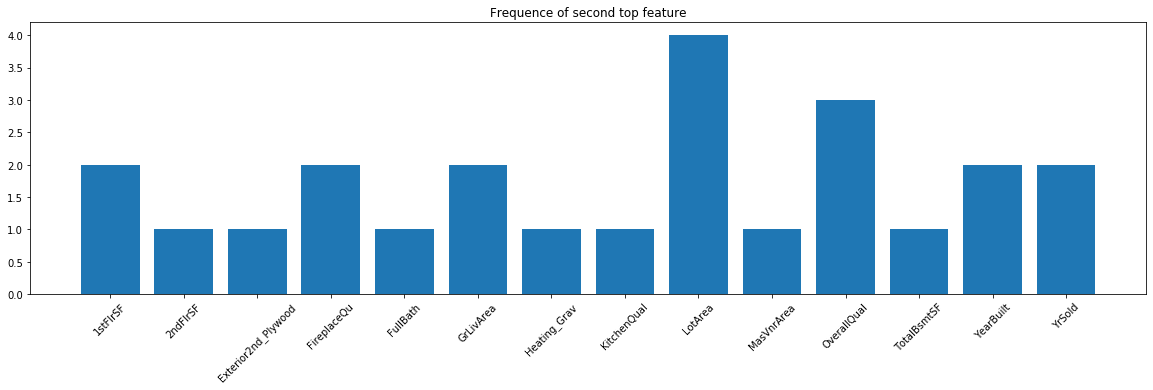

In [34]:
keys, counts = np.unique(feature.iloc[1], return_counts=True)

fig = plt.figure(figsize=(20,5))
#plt.subplot(121)
plt.bar(keys, counts)
plt.xticks(rotation=45)
plt.title('Frequence of second top feature');